In [1]:
import pandas as pd
data = {}

### Education Index

Source: Calculated using Mean Years of Schooling and Expected Years of Schooling.

Data in the tables are those available to the Human Development Report Office as of 15 November, 2013, unless otherwise specified.

http://hdr.undp.org/en/content/education-index

Symbols	:
```
..   Data not available
(.)  Greater (or less) than zero but small enough to be rounded off to zero at the displayed number of decimal points
<    Less than
-    Not applicable
T    Total
```

In [57]:
df = pd.read_csv('./datasets/Education index.csv')
df = df.drop(columns='HDI Rank').set_index('Country').stack().rename_axis(['country', 'year']).to_frame().rename(columns={0:'education index'})
# Set nan
df['education index'] = pd.to_numeric(df['education index'], errors='coerce')
data['education index'] = df
df

education index
country     year                 
Afghanistan 1980         0.076100
            1985         0.103083
            1990         0.121389
            1995         0.175289
            2000         0.225522
...                           ...
Zimbabwe    2009         0.496600
            2010         0.499933
            2011         0.499933
            2012         0.499933
            2013         0.499933

[2730 rows x 1 columns]

### Human Development Index (HDI)

The HDI was created to emphasize that people and their capabilities should be the ultimate criteria for assessing the development of a country, not economic growth alone. The HDI can also be used to question national policy choices, asking how two countries with the same level of GNI per capita can end up with different human development outcomes. These contrasts can stimulate debate about government policy priorities.
The Human Development Index (HDI) is a summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and have a decent standard of living. The HDI is the geometric mean of normalized indices for each of the three dimensions.

The health dimension is assessed by life expectancy at birth, the education dimension is measured by mean of years of schooling for adults aged 25 years and more and expected years of schooling for children of school entering age. The standard of living dimension is measured by gross national income per capita. The HDI uses the logarithm of income, to reflect the diminishing importance of income with increasing GNI. The scores for the three HDI dimension indices are then aggregated into a composite index using geometric mean. Refer to Technical notes for more details.

The HDI simplifies and captures only part of what human development entails. It does not reflect on inequalities, poverty, human security, empowerment, etc. The HDRO offers the other composite indices as broader proxy on some of the key issues of human development, inequality, gender disparity and poverty.

A fuller picture of a country's level of human development requires analysis of other indicators and information presented in the statistical annex of the report.

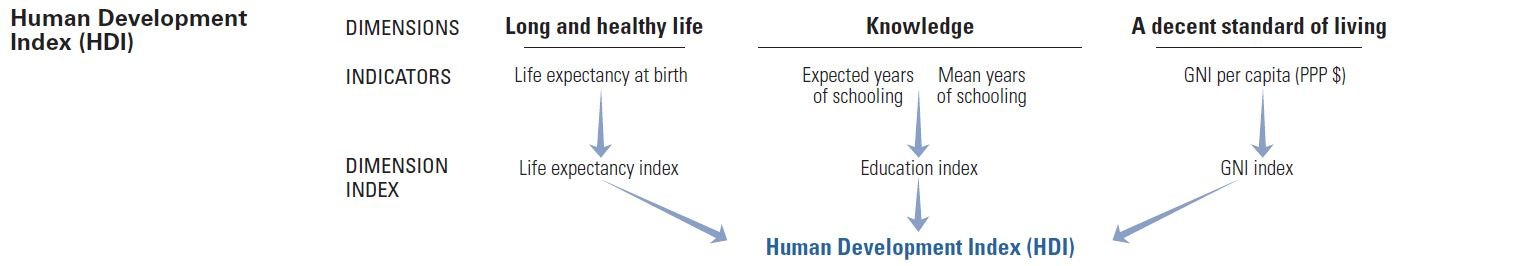

http://hdr.undp.org/en/content/human-development-index-hdi  
http://hdr.undp.org/en/data

In [70]:
df = pd.read_csv('./datasets/Human Development Index (HDI).csv')
df = df.drop(columns='HDI Rank (2018)')\
        .set_index('Country')\
        .stack().rename_axis(['country', 'year']).to_frame()\
        .rename(columns={0:'hdi'})
# # Set nan
df['hdi'] = pd.to_numeric(df['hdi'], errors='coerce')
data['hdi'] = df
df

hdi
country     year       
Afghanistan 1990  0.298
            1991  0.304
            1992  0.312
            1993  0.308
            1994  0.303
...                 ...
World       2014  0.718
            2015  0.722
            2016  0.727
            2017  0.729
            2018  0.731

[6146 rows x 1 columns]

### Per capita GDP at current prices - US dollars

The Economic Statistics Branch of the United Nations Statistics Division (UNSD) maintains and annually updates the National Accounts Main Aggregates database. It consists of a complete and consistent set of time series, from 1970 onwards, of the main National Accounts aggregates of all UN Members States and other territories in the world for which National Accounts information is available. Its contents are based on the official data reported to UNSD through the annual National Accounts Questionnaire, supplemented with data estimates for any years and countries with incomplete or inconsistent information.

Estimates are done when no official data are available. The final aggregates are provided in national currency and in United States dollars. The main aggregates in the database include Gross Domestic Product (GDP) by type of expenditure and Gross Value Added by kind of economic activity, both at current and at constant market prices. It also contains Gross National Income (GNI) at current prices and analytical indicators and ratios that reflect economic structure and trends of countries and areas. These analytical indicators are: annual per capita GDP and GNI (calculated using actual population or annual population estimates from the UN Population Division); annual growth rates of GDP; annual shares in total GDP and total Gross Value added of their respective components; and price trends as defined by the implicit price deflators of GDP.

The National Accounts Main Aggregates database is the product of a global cooperation effort between UNSD, international statistical agencies, and the national statistical services of more than 200 countries and territories. It has been prepared in response to a request by the Statistical Commission during its first session in 1947, and is in agreement with the resolution 48/223 C of the UN General Assembly, which mandates the Committee on Contributions to prepare the Scale of Assessment for UN Member States on the basis of the most recent reliable and verifiable available data on national accounts of as many countries and areas as possible, and that these data be published and disseminated regularly.


8 April 2019 Data updated and footnotes added to China.

Last update in UNdata: 2020/02/10  
Next update in UNdata: 2021/01/06

http://data.un.org/Data.aspx?d=SNAAMA&f=grID%3a101%3bcurrID%3aUSD%3bpcFlag%3a1

In [24]:
df = pd.read_csv('./datasets/Per capita GDP at current prices - US dollars.csv')
df = df.drop(columns='Item')\
        .set_index(['Country or Area', 'Year'])\
        .rename_axis(['country', 'year'])\
        .rename(columns={'Value':'gdp'})
# Set nan
df['gdp'] = pd.to_numeric(df['gdp'], errors='coerce')
data['gdp'] = df
df

gdp
country     year            
Afghanistan 2018  551.865029
            2017  592.777032
            2016  571.886266
            2015  598.835602
            2014  639.201474
...                      ...
Zimbabwe    1974  811.510083
            1973  698.192005
            1972  588.037380
            1971  493.287110
            1970  441.744085

[9870 rows x 1 columns]

### Life expectancy at birth

Source:  United Nations Statistics Division
Gender Info 2007 is a global database of gender statistics and indicators on a wide range of policy areas, including: population, families, health, education, work, and political participation. It can be used by governments, international organizations, advocacy groups, researchers and others in need of statistics for planning, analysis, advocacy and awareness-raising. Users will find in Gender Info an easy-to-use tool to shed light on gender issues through customizable tables, graphs and maps. It is an initiative of the United Nations Statistics Division, produced in collaboration with the United Nations Children’s Fund (UNICEF) and the United Nations Population Fund (UNFPA).

This database is no longer updated. Please visit http://unstats.un.org/unsd/gender/data.html for other Gender Statistics.  
Last update in UNdata: 2008/03/21  
Next update in UNdata: Not applicable

http://data.un.org/Data.aspx?d=GenderStat&f=inID%3a37

In [94]:
indicator = 'life expectancy'

df = pd.read_csv('./datasets/Life expectancy at birth.csv')
df = df.drop(columns=['Source', 'Unit', 'Value Footnotes'])\
        .set_index(['Country or Area', 'Year'])\
        .groupby(by=['Country or Area', 'Year']).mean()\
        .rename(columns={'Value':indicator})
# # # Set nan
df[indicator] = pd.to_numeric(df[indicator], errors='coerce')
data[indicator] = df
df

life expectancy
Country or Area Year                      
Afghanistan     1985-1990             41.0
                1990-1995             42.0
                1995-2000             42.0
                2000-2005             42.0
Albania         1985-1990             72.0
...                                    ...
Zambia          2000-2005             39.0
Zimbabwe        1985-1990             62.0
                1990-1995             60.5
                1995-2000             47.0
                2000-2005             40.0

[780 rows x 1 columns]

Footnotes:

| fnSeqID | Footnote                                                                                                                        |
|---------|---------------------------------------------------------------------------------------------------------------------------------|
| 1       | Including Christmas Island, Cocos (Keeling) Islands, and Norfolk Island.                                                        |
| 2       | Refers to Guernsey, and Jersey.                                                                                                 |
| 3       | For statistical purposes, the data for China do not include Hong Kong and Macao, Special Administrative Regions (SAR) of China. |
| 4       | Including the island of Mayotte.                                                                                                |
| 5       | Including Åland Islands.                                                                                                        |
| 6       | As of 1 July 1997, Hong Kong became a Special Administrative Region (SAR) of China.                                             |
| 7       | As of 20 December 1999, Macao became a Special Administrative Region (SAR) of China.                                            |
| 8       | The former Yugoslav Republic of Macedonia.                                                                                      |
| 9       | Including Agalega, Rodrigues, and Saint Brandon.                                                                                |
| 10      | Including Svalbard and Jan Mayen Islands.                                                                                       |